# 1. Clustering using K-means and EM

In [3]:
import numpy as np
import pandas as pd
from time import time
import matplotlib
import matplotlib.pyplot as plt
import warnings
import csv
import time


%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

from sklearn.cross_validation import StratifiedShuffleSplit

data = pd.read_csv("census-reproduced.csv")   
data2 = pd.read_csv("tmdb-movies-reproduced.csv")

labels = data["income"]
labels2 = data2["profit"]

features = data.drop("income",axis = 1)
features2 = data2.drop("profit",axis = 1)

/Users/luwang/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
sss = StratifiedShuffleSplit(labels.values,test_size = 0.3,random_state = 0,n_iter = 1)

for train_index, test_index in sss:
    X_train, X_test = features.values[train_index], features.values[test_index]
    y_train, y_test = labels.values[train_index], labels.values[test_index]
    
# Show the results of splitting
print "Training set1 size:", X_train.shape
print "Testing set1 size:", X_test.shape

Training set1 size: (31655, 103)
Testing set1 size: (13567, 103)


In [5]:
sss = StratifiedShuffleSplit(labels2.values,test_size = 0.3,random_state = 0,n_iter = 1)

for train_index, test_index in sss:
    X_train2, X_test2 = features2.values[train_index], features2.values[test_index]
    y_train2, y_test2 = labels2.values[train_index], labels2.values[test_index]
    
# Show the results of splitting
print "Training set2 size:", X_train2.shape
print "Testing set2 size:", X_test2.shape

Training set2 size: (4311, 79)
Testing set2 size: (1848, 79)


In [6]:
from sklearn.cluster import KMeans

from sklearn.mixture import BayesianGaussianMixture

from sklearn.metrics import adjusted_mutual_info_score,adjusted_rand_score,homogeneity_completeness_v_measure

## 1.1 Dataset 1

In [5]:
#dataset1

km_dic = {"n_clusters":0,"init":"k-means++","n_init":1,"max_iter":100}
EM_dic = {"n_components":0,"init_params":"kmeans","n_init":1,"max_iter":100}

n_candidates = [i*5+1 for i in range(20)]

clustering_results1 = [["","KM score","KM mutual info","KM rand","KM homogeneity","KM completeness","KM v-measure","KM time",
                       "EM score","EM mutual info","EM rand","EM homogeneity","EM completeness","EM v-measure","EM time"]]

round_start = time.time()
for n in n_candidates:
    
    
    km_dic["n_clusters"] = n
    EM_dic["n_components"] = n
    
    row = [n]
    
    model = KMeans(**km_dic)
    start_time = time.time()
    model.fit(features)
    preds = model.predict(features)
    end_time = time.time()
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(labels,preds)   
    row += [-model.score(features),adjusted_mutual_info_score(labels,preds),adjusted_rand_score(labels,preds),
            homogeneity,completeness,v_measure,end_time - start_time]    


    model = BayesianGaussianMixture(**EM_dic)
    start_time = time.time()
    model.fit(features)
    preds = model.predict(features)
    end_time = time.time()
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(labels,preds)   
    row += [model.score(features),adjusted_mutual_info_score(labels,preds),adjusted_rand_score(labels,preds),
            homogeneity,completeness,v_measure,end_time - start_time]    

    print n   
    clustering_results1.append(row)
round_end = time.time()

print "Totoal Time:",round_end - round_start

# output    
with open("1.dataset1_KMeans_clustering.csv",'wb') as resultFile:
    wr = csv.writer(resultFile, dialect='excel')
    wr.writerows(clustering_results1)     

1
6
11
16
21
26
31
36
41
46
51


/Users/luwang/anaconda/lib/python2.7/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


56
61
66
71
76
81
86
91
96
Totoal Time: 7973.58802509


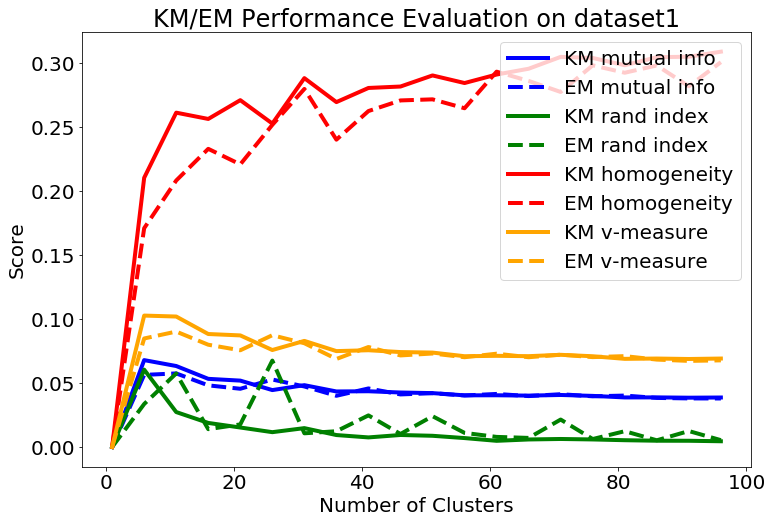

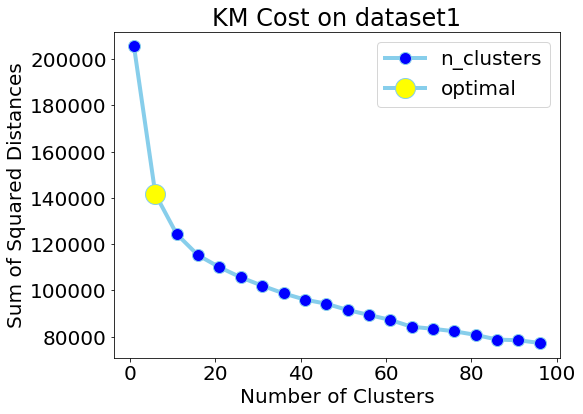

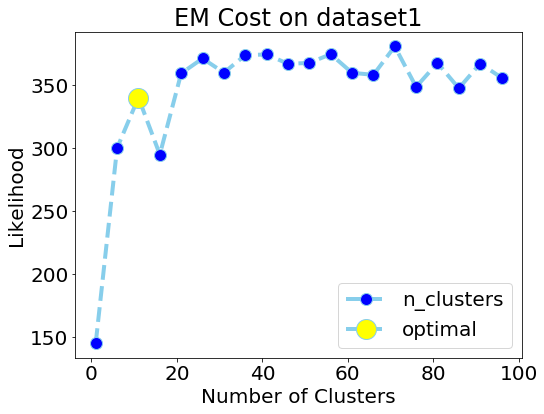

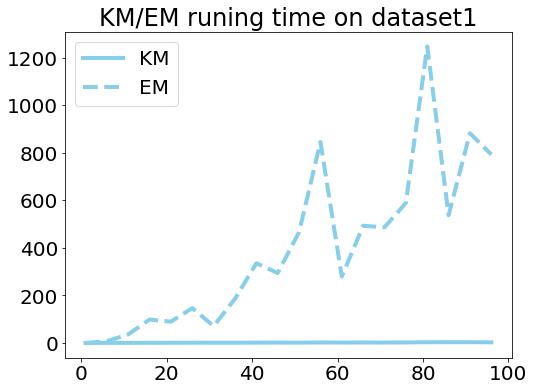

In [59]:
clustering_df1 = pd.read_csv("1.dataset1_KMeans_clustering.csv")
x = clustering_df1.iloc[:,0]
 
# score    
plt.figure(figsize = (12,8))    
plt.plot( x, clustering_df1["KM mutual info"], color='blue', linewidth=4,label = "KM mutual info")
plt.plot( x, clustering_df1["EM mutual info"],linestyle='dashed',color='blue', linewidth=4,label = "EM mutual info")

plt.plot( x, clustering_df1["KM rand"],color='green', linewidth=4,label = "KM rand index")
plt.plot( x, clustering_df1["EM rand"],linestyle='dashed',color='green', linewidth=4,label = "EM rand index")

plt.plot( x, clustering_df1["KM homogeneity"],color='red', linewidth=4,label = "KM homogeneity")
plt.plot( x, clustering_df1["EM homogeneity"],linestyle='dashed',color='red', linewidth=4,label = "EM homogeneity")

plt.plot( x, clustering_df1["KM v-measure"],color='orange', linewidth=4,label = "KM v-measure");
plt.plot( x, clustering_df1["EM v-measure"],linestyle='dashed',color='orange', linewidth=4,label = "EM v-measure");
plt.legend(loc='upper right')
plt.title("KM/EM Performance Evaluation on dataset1")
plt.xlabel("Number of Clusters")
plt.ylabel("Score");

# KM cost/EM cost
plt.figure(figsize = (8,6)) 
plt.plot( x,clustering_df1["KM score"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label = "n_clusters")
plt.plot( 6,clustering_df1["KM score"][1], marker='o', markerfacecolor='yellow', markersize=20, color='skyblue', linewidth=4,label = "optimal")
plt.title("KM Cost on dataset1")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances");
plt.legend(loc='upper right')


plt.figure(figsize = (8,6)) 
plt.plot( x,clustering_df1["EM score"], marker='o', markerfacecolor='blue', linestyle='dashed',markersize=12, color='skyblue', linewidth=4,label = "n_clusters")
plt.plot( 11,clustering_df1["EM score"][2], marker='o', markerfacecolor='yellow',linestyle='dashed', markersize=20, color='skyblue', linewidth=4,label = "optimal")
plt.title("EM Cost on dataset1")
plt.xlabel("Number of Clusters")
plt.ylabel("Likelihood");
plt.legend(loc='lower right')


# KM speed/EM speed
plt.figure(figsize = (8,6)) 
plt.plot( x,clustering_df1["KM time"],  markersize=12, color='skyblue', linewidth=4,label = "KM")
plt.plot( x,clustering_df1["EM time"], linestyle='dashed',markersize=12, color='skyblue', linewidth=4,label = "EM");
plt.title("KM/EM runing time on dataset1")
plt.legend(loc='upper left')

## 1.2 Dataset 2

In [7]:
#dataset2

km_dic = {"n_clusters":0,"init":"k-means++","n_init":1,"max_iter":100}
EM_dic = {"n_components":0,"init_params":"kmeans","n_init":1,"max_iter":100}

n_candidates = [i*5+1 for i in range(20)]

clustering_results2 = [["","KM score","KM mutual info","KM rand","KM homogeneity","KM completeness","KM v-measure","KM time",
                       "EM score","EM mutual info","EM rand","EM homogeneity","EM completeness","EM v-measure","EM time"]]

round_start = time.time()
for n in n_candidates:    
    km_dic["n_clusters"] = n
    EM_dic["n_components"] = n
    
    row = [n]
    
    model = KMeans(**km_dic)
    start_time = time.time()
    model.fit(features)
    preds = model.predict(features)
    end_time = time.time()
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(labels,preds)   
    row += [-model.score(features),adjusted_mutual_info_score(labels,preds),adjusted_rand_score(labels,preds),
            homogeneity,completeness,v_measure,end_time - start_time]    


    model = BayesianGaussianMixture(**EM_dic)
    start_time = time.time()
    model.fit(features)
    preds = model.predict(features)
    end_time = time.time()
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(labels,preds)   
    row += [model.score(features),adjusted_mutual_info_score(labels,preds),adjusted_rand_score(labels,preds),
            homogeneity,completeness,v_measure,end_time - start_time]    
       
    clustering_results2.append(row)
    print n
    
round_end = time.time()

print "Totoal Time:",round_end - round_start

# output    
with open("1.dataset2_KMeans_clustering.csv",'wb') as resultFile:
    wr = csv.writer(resultFile, dialect='excel')
    wr.writerows(clustering_results2)     

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
Totoal Time: 5879.734869


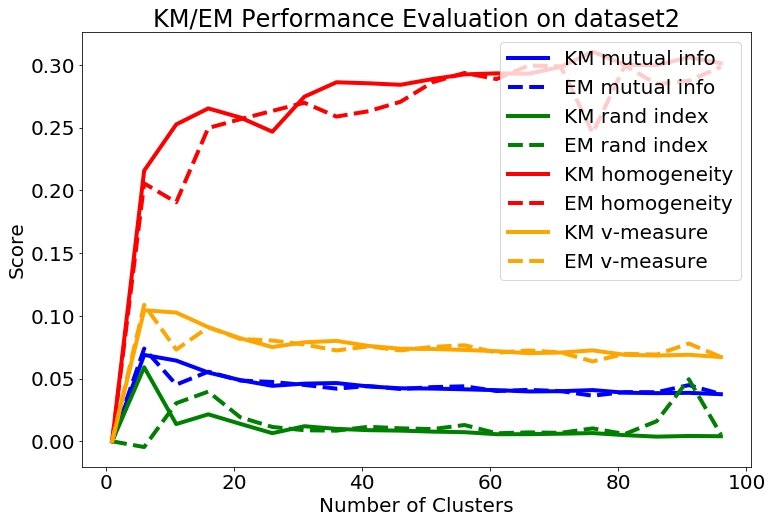

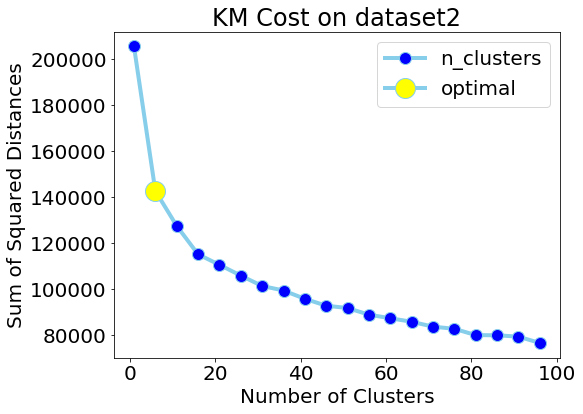

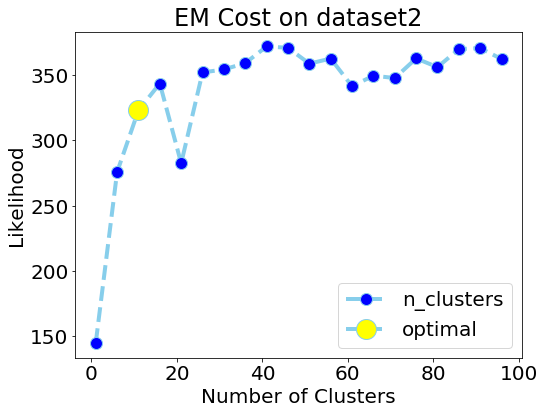

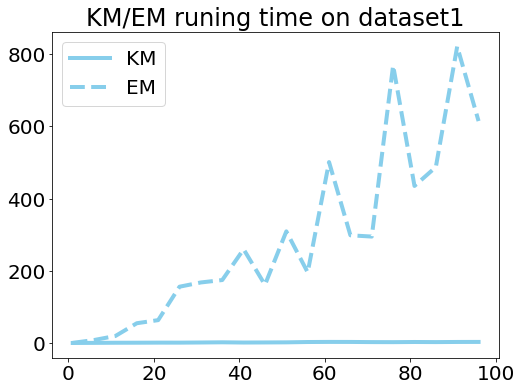

In [60]:
clustering_df2 = pd.read_csv("1.dataset2_KMeans_clustering.csv")
x = clustering_df2.iloc[:,0]
 
# score    
plt.figure(figsize = (12,8))    
plt.plot( x, clustering_df2["KM mutual info"], color='blue', linewidth=4,label = "KM mutual info")
plt.plot( x, clustering_df2["EM mutual info"],linestyle='dashed',color='blue', linewidth=4,label = "EM mutual info")

plt.plot( x, clustering_df2["KM rand"],color='green', linewidth=4,label = "KM rand index")
plt.plot( x, clustering_df2["EM rand"],linestyle='dashed',color='green', linewidth=4,label = "EM rand index")

plt.plot( x, clustering_df2["KM homogeneity"],color='red', linewidth=4,label = "KM homogeneity")
plt.plot( x, clustering_df2["EM homogeneity"],linestyle='dashed',color='red', linewidth=4,label = "EM homogeneity")

plt.plot( x, clustering_df2["KM v-measure"],color='orange', linewidth=4,label = "KM v-measure");
plt.plot( x, clustering_df2["EM v-measure"],linestyle='dashed',color='orange', linewidth=4,label = "EM v-measure");
plt.legend(loc='upper right')
plt.title("KM/EM Performance Evaluation on dataset2")
plt.xlabel("Number of Clusters")
plt.ylabel("Score");

# KM cost/EM cost
plt.figure(figsize = (8,6)) 
plt.plot( x,clustering_df2["KM score"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label = "n_clusters")
plt.plot( 6,clustering_df2["KM score"][1], marker='o', markerfacecolor='yellow', markersize=20, color='skyblue', linewidth=4,label = "optimal")
plt.title("KM Cost on dataset2")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances");
plt.legend(loc='upper right')


plt.figure(figsize = (8,6)) 
plt.plot( x,clustering_df2["EM score"], marker='o', markerfacecolor='blue', linestyle='dashed',markersize=12, color='skyblue', linewidth=4,label = "n_clusters")
plt.plot( 11,clustering_df2["EM score"][2], marker='o', markerfacecolor='yellow',linestyle='dashed', markersize=20, color='skyblue', linewidth=4,label = "optimal")
plt.title("EM Cost on dataset2")
plt.xlabel("Number of Clusters")
plt.ylabel("Likelihood");
plt.legend(loc='lower right')


# KM speed/EM speed
plt.figure(figsize = (8,6)) 
plt.plot( x,clustering_df2["KM time"],  markersize=12, color='skyblue', linewidth=4,label = "KM")
plt.plot( x,clustering_df2["EM time"], linestyle='dashed',markersize=12, color='skyblue', linewidth=4,label = "EM");
plt.title("KM/EM runing time on dataset1")
plt.legend(loc='upper left')

# 2. Dimensionality Reduction using PCA, ICA, RP, and SVD

In [7]:
from sklearn.decomposition import PCA,FastICA,TruncatedSVD

from sklearn.random_projection import GaussianRandomProjection

from sklearn.metrics.pairwise import cosine_similarity

from tabulate import tabulate

## 2.1 Choose n_components for PCA

Reduced Dimension: 67 out of 103
Variance captured: 94.0773477971 %


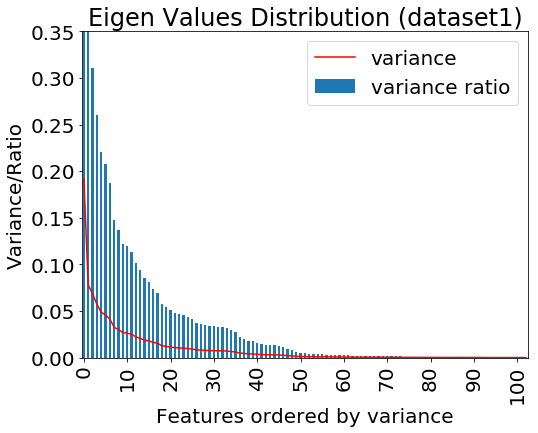

In [33]:
# dataset1: 36
# ordered features, easy to select
pca = PCA()
temp = pca.fit_transform(features)
pca_res = pd.Series(pca.explained_variance_ratio_)
pca_var = pd.Series(pca.explained_variance_)

plt.figure(figsize=(8,6))
pca_res.plot(ylim = (0.,0.35),c = 'r',label = 'variance')
ax = pca_var.plot(kind = 'bar',ylim = (0.,0.35),label = "variance ratio")

ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::10])
ax.xaxis.set_ticklabels(ticklabels[::10]);
plt.legend()

plt.title("Eigen Values Distribution (dataset1)")
plt.xlabel("Features ordered by variance")
plt.ylabel("Variance/Ratio")

print "Reduced Dimension: {} out of {}".format(features.shape[1]-len([i for i in pca_res if i >= 0.005]),features.shape[1])
print "Variance captured: {} %".format(sum([i for i in pca_res if i >= 0.005])*100.)

Reduced Dimension: 19 out of 79
Variance captured: 97.2511331166 %


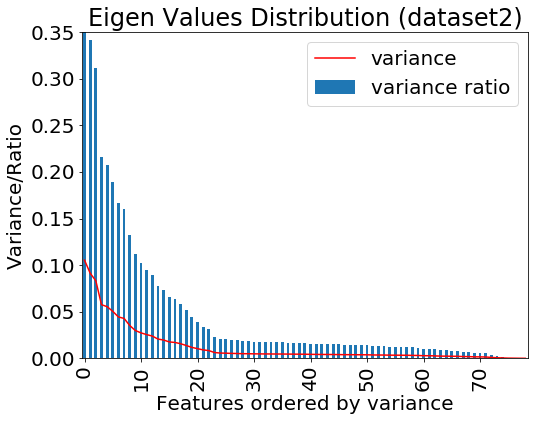

In [34]:
# dataset2: 60
pca = PCA()
temp = pca.fit_transform(features2)
pca_res2 = pd.Series(pca.explained_variance_ratio_)
pca_var2 = pd.Series(pca.explained_variance_)

plt.figure(figsize=(8,6))
pca_res2.plot(ylim = (0.,0.35),c = 'r',label = 'variance')
ax = pca_var2.plot(kind = 'bar',ylim = (0.,0.35),label = "variance ratio")
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::10])
ax.xaxis.set_ticklabels(ticklabels[::10]);
plt.legend()

plt.title("Eigen Values Distribution (dataset2)")
plt.xlabel("Features ordered by variance")
plt.ylabel("Variance/Ratio")

print "Reduced Dimension: {} out of {}".format(features2.shape[1]-len([i for i in pca_res2 if i >= 0.003]),features2.shape[1])
print "Variance captured: {} %".format(sum([i for i in pca_res2 if i >= 0.003])*100.)



## Reconstruct dataset2 from PCA data

In [19]:
from tabulate import tabulate

n_candidates = [int(features2.shape[1]*0.1*(i+1)) for i in range(10)]
reconstruct_pca_res2 = []
for i,n in enumerate(n_candidates):
    pca = PCA(n)
    temp = pca.fit_transform(features2)
    diff = features2.values - pca.inverse_transform(temp)
    reconstruct_pca_res2.append(["{} ({}%)".format(n,(i+1)*10),np.mean(diff),np.std(diff),np.max(diff),np.min(diff)])
    
print tabulate(reconstruct_pca_res2, headers=['N components', 'mean',"std","max",'min'],tablefmt='fancy_grid')

╒════════════════╤══════════════╤═════════════╤═════════════╤══════════════╕
│ N components   │         mean │         std │         max │          min │
╞════════════════╪══════════════╪═════════════╪═════════════╪══════════════╡
│ 7 (10%)        │ -4.23863e-18 │ 0.155864    │ 1.10707     │ -0.999114    │
├────────────────┼──────────────┼─────────────┼─────────────┼──────────────┤
│ 15 (20%)       │ -6.58247e-18 │ 0.116831    │ 1.03318     │ -1.00288     │
├────────────────┼──────────────┼─────────────┼─────────────┼──────────────┤
│ 23 (30%)       │ -6.86358e-18 │ 0.0935624   │ 1.02845     │ -0.998063    │
├────────────────┼──────────────┼─────────────┼─────────────┼──────────────┤
│ 31 (40%)       │ -2.64138e-18 │ 0.0824535   │ 0.996144    │ -0.937329    │
├────────────────┼──────────────┼─────────────┼─────────────┼──────────────┤
│ 39 (50%)       │ -3.21639e-18 │ 0.0712363   │ 1.01054     │ -0.907301    │
├────────────────┼──────────────┼─────────────┼─────────────┼──────────────┤

## 2.2 Choose n_components for LCA

In [204]:
# bag of features, sorted independence
# picking of features based on independence??
# Kurtosis is defined as the normalized form of the fourth central moment of a distribution: 
# sort by kurtosis!! then choose based on 

from scipy.stats import kurtosis,entropy

# dataset1:84
ica = FastICA(tol = 0.001)
temp = ica.fit_transform(features)
order = [-abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]
temp = temp[:,np.array(order).argsort()]
ica_res =  pd.Series([abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]);

Reduced Dimension: 16 out of 103


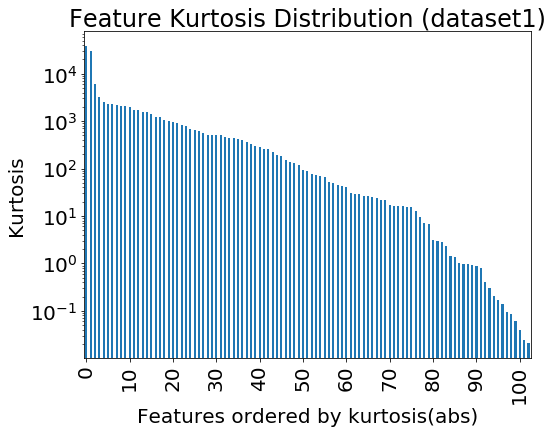

In [205]:
plt.figure(figsize=(8,6))
ax = ica_res.plot(kind = 'bar',logy = True);
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::10])
ax.xaxis.set_ticklabels(ticklabels[::10]);


plt.title("Feature Kurtosis Distribution (dataset1)")
plt.xlabel("Features ordered by kurtosis(abs)")
plt.ylabel("Kurtosis")


print "Reduced Dimension: {} out of {}".format(features.shape[1]-len([i for i in ica_res if i >= 1.]),features.shape[1])

In [206]:
# dataset2:63
ica = FastICA(tol = 0.001)
temp = ica.fit_transform(features2)
order = [-abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]
temp = temp[:,np.array(order).argsort()]
ica_res =  pd.Series([abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]);

Reduced Dimension: 19 out of 79


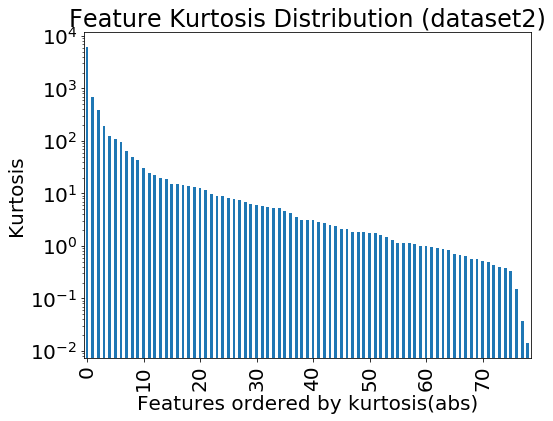

In [207]:
plt.figure(figsize=(8,6))
ax = ica_res.plot(kind = 'bar',logy = True);
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::10])
ax.xaxis.set_ticklabels(ticklabels[::10]);

plt.title("Feature Kurtosis Distribution (dataset2)")
plt.xlabel("Features ordered by kurtosis(abs)")
plt.ylabel("Kurtosis")


print "Reduced Dimension: {} out of {}".format(features2.shape[1]-len([i for i in ica_res if i >= 1.]),features2.shape[1])

## Reconstruct dataset2 from ICA data

In [21]:
n_candidates = [int(features2.shape[1]*0.1*(i+1)) for i in range(10)]
reconstruct_ica_res2 = []
for i,n in enumerate(n_candidates):
    ica = FastICA(n,tol = 0.001)
    temp = ica.fit_transform(features2)
    diff = features2.values - ica.inverse_transform(temp)
    reconstruct_ica_res2.append(["{} ({}%)".format(n,(i+1)*10),np.mean(diff),np.std(diff),np.max(diff),np.min(diff)])
    
print tabulate(reconstruct_ica_res2, headers=['N components', 'mean',"std","max",'min'],tablefmt='fancy_grid')

╒════════════════╤══════════════╤═════════════╤═══════════╤════════════╕
│ N components   │         mean │         std │       max │        min │
╞════════════════╪══════════════╪═════════════╪═══════════╪════════════╡
│ 7 (10%)        │ -2.52638e-18 │ 0.155864    │ 1.10706   │ -0.999113  │
├────────────────┼──────────────┼─────────────┼───────────┼────────────┤
│ 15 (20%)       │ -4.12728e-18 │ 0.116829    │ 1.0351    │ -1.00295   │
├────────────────┼──────────────┼─────────────┼───────────┼────────────┤
│ 23 (30%)       │ -1.2066e-18  │ 0.0935518   │ 1.02592   │ -0.997637  │
├────────────────┼──────────────┼─────────────┼───────────┼────────────┤
│ 31 (40%)       │ -2.56472e-18 │ 0.0821237   │ 0.997609  │ -0.915939  │
├────────────────┼──────────────┼─────────────┼───────────┼────────────┤
│ 39 (50%)       │ -3.70971e-18 │ 0.0707766   │ 1.00184   │ -0.899981  │
├────────────────┼──────────────┼─────────────┼───────────┼────────────┤
│ 47 (60%)       │ -3.98854e-18 │ 0.0587326   │ 1.0

## 2.3 Choose n_components for RP

In [217]:
# dataset1:PCA
repeats = []
for i in range(5):
    rp = PCA(n_components = 36)
    temp = rp.fit_transform(features)
    repeats.append(temp)

diffs = []
for (i,j) in [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]:
    diffs.append(repeats[i]-repeats[j])
print "Mean pairwise differences:",np.mean(diffs)
print "STD of the pairwise differences:",np.std(diffs)

Mean pairwise differences: 3.24512180952e-17
STD of the pairwise differences: 0.00121617426643


In [29]:
# dataset1: RP
repeats = []
for i in range(5):
    rp = GaussianRandomProjection(n_components = 36)
    temp = rp.fit_transform(features)
    repeats.append(temp)

diffs = []
for (i,j) in [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]:
    diffs.append(repeats[i]-repeats[j])
print "Mean pairwise differences:",np.mean(diffs)
print "STD of the pairwise differences:",np.std(diffs)

Mean pairwise differences: -0.0135895799742
STD of the pairwise differences: 0.698433485007


In [218]:
# dataset2: PCA
repeats = []
for i in range(5):
    rp = PCA(n_components = 60)
    temp = rp.fit_transform(features2)
    repeats.append(temp)

diffs = []
for (i,j) in [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]:
    diffs.append(repeats[i]-repeats[j])
print "Mean pairwise differences:",np.mean(diffs)
print "STD of the pairwise differences:",np.std(diffs)

Mean pairwise differences: -3.43515994576e-18
STD of the pairwise differences: 0.0350664671162


In [30]:
# dataset2: RP
repeats = []
for i in range(5):
    rp = GaussianRandomProjection(n_components = 60)
    temp = rp.fit_transform(features2)
    repeats.append(temp)

diffs = []
for (i,j) in [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]:
    diffs.append(repeats[i]-repeats[j])
print "Mean pairwise differences:",np.mean(diffs)
print "STD of the pairwise differences:",np.std(diffs)

Mean pairwise differences: 0.000438174550012
STD of the pairwise differences: 0.68983998274


In [224]:
comparision = [["PCA",1,5,10,3.25e-17,0.001],
               ["RP",1,5,10,-0.0136,0.698],
               ["PCA",2,5,10,-3.44e-18,0.035],
               ["RP",2,5,10,0.0004,0.690]]

print tabulate(comparision,headers = ["","dataset","Nrepeats","Npairs","pairwise mean(diff)","pairwise std(diff)"])


       dataset    Nrepeats    Npairs    pairwise mean(diff)    pairwise std(diff)
---  ---------  ----------  --------  ---------------------  --------------------
PCA          1           5        10               3.25e-17                 0.001
RP           1           5        10              -0.0136                   0.698
PCA          2           5        10              -3.44e-18                 0.035
RP           2           5        10               0.0004                   0.69


## Reconstruct dataset2 from RP data

In [228]:
n_candidates = [int(features2.shape[1]*1*(i+1)) for i in range(10)]
reconstruct_rp_res2 = []
for i,n in enumerate(n_candidates):
    rp = GaussianRandomProjection(n)
    temp = rp.fit_transform(features2)
    diff = features2.values - np.matmul(temp,rp.components_)
    reconstruct_rp_res2.append(["{} ({}%)".format(n,(i+1)*100),np.mean(diff),np.std(diff),np.max(diff),np.min(diff)])
    
print tabulate(reconstruct_rp_res2, headers=['N components', 'mean',"std","max",'min'],tablefmt='fancy_grid')

╒════════════════╤══════════════╤══════════╤══════════╤═══════════╕
│ N components   │         mean │      std │      max │       min │
╞════════════════╪══════════════╪══════════╪══════════╪═══════════╡
│ 79 (100%)      │ -0.0891546   │ 0.439493 │ 1.68188  │ -1.934    │
├────────────────┼──────────────┼──────────┼──────────┼───────────┤
│ 158 (200%)     │  0.00789225  │ 0.315671 │ 1.1064   │ -1.48574  │
├────────────────┼──────────────┼──────────┼──────────┼───────────┤
│ 237 (300%)     │ -0.0519207   │ 0.24773  │ 0.957342 │ -1.09446  │
├────────────────┼──────────────┼──────────┼──────────┼───────────┤
│ 316 (400%)     │  0.00641421  │ 0.189863 │ 0.776939 │ -0.922162 │
├────────────────┼──────────────┼──────────┼──────────┼───────────┤
│ 395 (500%)     │ -0.0423475   │ 0.221773 │ 0.778822 │ -0.826054 │
├────────────────┼──────────────┼──────────┼──────────┼───────────┤
│ 474 (600%)     │ -0.0117068   │ 0.178676 │ 0.655387 │ -0.813206 │
├────────────────┼──────────────┼──────────┼────

## 2.4 Choose n_components for SVD

Reduced Dimension: 60 out of 103
Variance captured: 96.8098029093 %


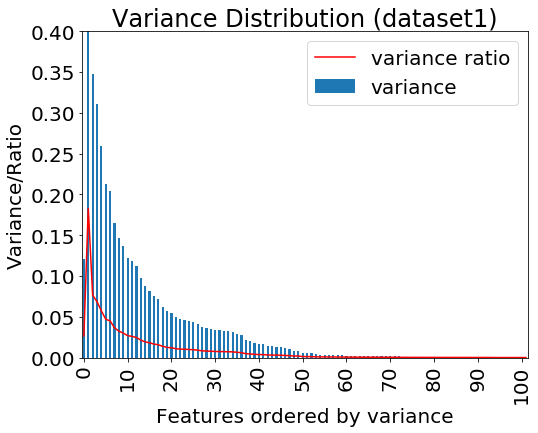

In [229]:
# dataset1: 43
# ordered features, easy to select

svd = TruncatedSVD(n_components = features.shape[1]-1)
temp = svd.fit_transform(features)
svd_res = pd.Series(svd.explained_variance_ratio_)
svd_var = pd.Series(svd.explained_variance_)

plt.figure(figsize=(8,6))
svd_res.plot(ylim = (0.,0.4),c = 'r',label = 'variance ratio')
ax = svd_var.plot(kind = 'bar',ylim = (0.,0.4),label = 'variance')
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::10])
ax.xaxis.set_ticklabels(ticklabels[::10]);
plt.legend()

plt.title("Variance Distribution (dataset1)")
plt.xlabel("Features ordered by variance")
plt.ylabel("Variance/Ratio")


print "Reduced Dimension: {} out of {}".format(1+features.shape[1]-len([i for i in svd_res if i >= 0.003]),features.shape[1])
print "Variance captured: {} %".format(sum([i for i in svd_res if i >= 0.003])*100.)

Reduced Dimension: 20 out of 79
Variance captured: 97.202661258 %


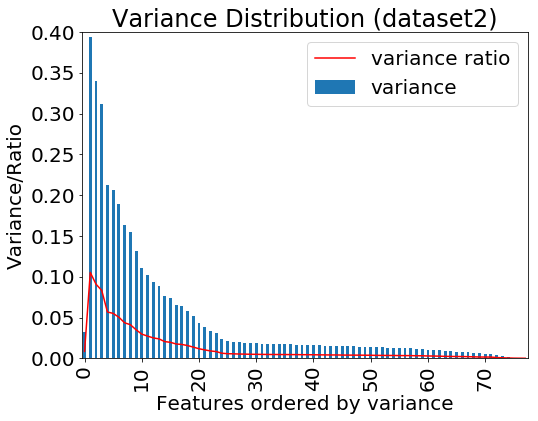

In [230]:
# dataset2: 59
# ordered features, easy to select

svd = TruncatedSVD(n_components = features2.shape[1]-1)
temp = svd.fit_transform(features2)
svd_res = pd.Series(svd.explained_variance_ratio_)
svd_var = pd.Series(svd.explained_variance_)

plt.figure(figsize=(8,6))
svd_res.plot(ylim = (0.,0.4),c = 'r',label = 'variance ratio')
ax = svd_var.plot(kind = 'bar',ylim = (0.,0.4),label = 'variance')
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::10])
ax.xaxis.set_ticklabels(ticklabels[::10]);
plt.legend()

plt.title("Variance Distribution (dataset2)")
plt.xlabel("Features ordered by variance")
plt.ylabel("Variance/Ratio")

print "Reduced Dimension: {} out of {}".format(1+features2.shape[1]-len([i for i in svd_res if i >= 0.003]),features2.shape[1])
print "Variance captured: {} %".format(sum([i for i in svd_res if i >= 0.003])*100.)

## Reconstruct dataset2 from SVD data

In [231]:
n_candidates = [int(features2.shape[1]*0.1*(i+1))-1 for i in range(10)]
reconstruct_svd_res2 = []
for i,n in enumerate(n_candidates):
    svd = TruncatedSVD(n)
    temp = svd.fit_transform(features2)
    diff = features2.values - svd.inverse_transform(temp)
    reconstruct_svd_res2.append(["{} ({}%)".format(n,(i+1)*10),np.mean(diff),np.std(diff),np.max(diff),np.min(diff)])
    
print tabulate(reconstruct_svd_res2, headers=['N components', 'mean',"std","max",'min'],tablefmt='fancy_grid')

╒════════════════╤══════════════╤════════════╤══════════╤═══════════╕
│ N components   │         mean │        std │      max │       min │
╞════════════════╪══════════════╪════════════╪══════════╪═══════════╡
│ 6 (10%)        │ -4.28654e-06 │ 0.168686   │ 1.17171  │ -0.966814 │
├────────────────┼──────────────┼────────────┼──────────┼───────────┤
│ 14 (20%)       │ -3.1573e-05  │ 0.124002   │ 1.04167  │ -0.932826 │
├────────────────┼──────────────┼────────────┼──────────┼───────────┤
│ 22 (30%)       │ -5.53104e-06 │ 0.0969699  │ 1.01104  │ -0.923991 │
├────────────────┼──────────────┼────────────┼──────────┼───────────┤
│ 30 (40%)       │  1.16372e-06 │ 0.084049   │ 0.997874 │ -0.839463 │
├────────────────┼──────────────┼────────────┼──────────┼───────────┤
│ 38 (50%)       │  2.54813e-06 │ 0.0728362  │ 0.998413 │ -0.832607 │
├────────────────┼──────────────┼────────────┼──────────┼───────────┤
│ 46 (60%)       │  4.3558e-06  │ 0.0608254  │ 1.00519  │ -0.81295  │
├────────────────┼──

# 3. Clustering on Dimension Reduced Data

## 3.0 Comparison

Training time: 0.360075950623 sec
Training time: 0.0296261310577 sec


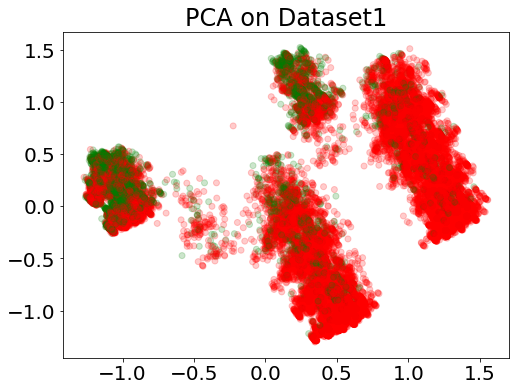

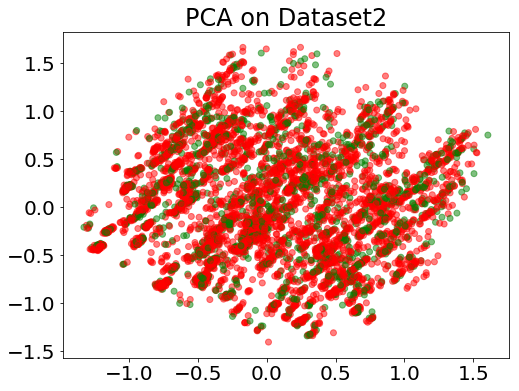

In [234]:
# pca
start_time = time.time()
temp = PCA(n_components = 2).fit_transform(features)
end_time = time.time()

print "Training time: {} sec".format(end_time - start_time)
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels[i] == 0 else 'g' for i in range(len(labels))],alpha = 0.2);
plt.title("PCA on Dataset1")

start_time = time.time()
temp = PCA(n_components = 2).fit_transform(features2)
end_time = time.time()

print "Training time: {} sec".format(end_time - start_time)
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels[i] == 0 else 'g' for i in range(len(labels))],alpha = 0.5);
plt.title("PCA on Dataset2")



Training time: 1.48455095291 sec
Training time: 0.0932030677795 sec


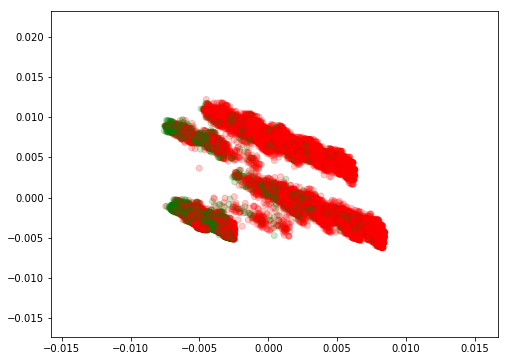

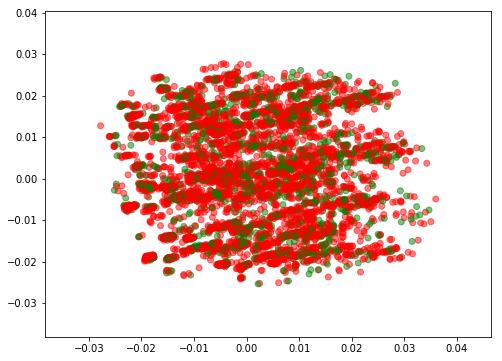

In [15]:
# ica
start_time = time.time()
temp = FastICA(n_components = 2).fit_transform(features)
end_time = time.time()

print "Training time: {} sec".format(end_time - start_time)
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels[i] == 0 else 'g' for i in range(len(labels))],alpha = 0.2);

start_time = time.time()
temp = FastICA(n_components = 2).fit_transform(features2)
end_time = time.time()

print "Training time: {} sec".format(end_time - start_time)
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels[i] == 0 else 'g' for i in range(len(labels))],alpha = 0.5);

Training time: 0.067391872406 sec
Training time: 0.00242495536804 sec


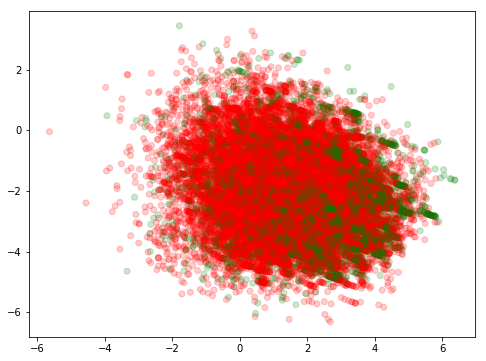

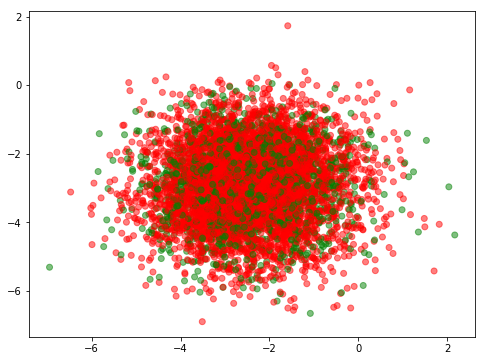

In [16]:
# rp
start_time = time.time()
temp = GaussianRandomProjection(n_components = 2).fit_transform(features)
end_time = time.time()

print "Training time: {} sec".format(end_time - start_time)
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels[i] == 0 else 'g' for i in range(len(labels))],alpha = 0.2);

start_time = time.time()
temp = GaussianRandomProjection(n_components = 2).fit_transform(features2)
end_time = time.time()

print "Training time: {} sec".format(end_time - start_time)
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels[i] == 0 else 'g' for i in range(len(labels))],alpha = 0.5);

Training time: 0.230122089386 sec
Training time: 0.024307012558 sec


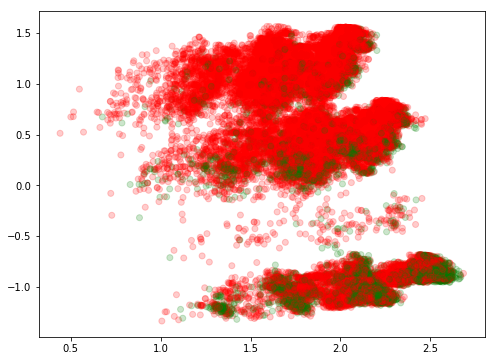

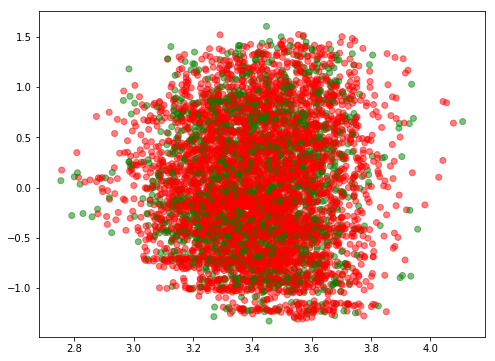

In [17]:
# svd
start_time = time.time()
temp = TruncatedSVD(n_components = 2).fit_transform(features)
end_time = time.time()

print "Training time: {} sec".format(end_time - start_time)
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels[i] == 0 else 'g' for i in range(len(labels))],alpha = 0.2);


start_time = time.time()
temp = TruncatedSVD(n_components = 2).fit_transform(features2)
end_time = time.time()

print "Training time: {} sec".format(end_time - start_time)
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels[i] == 0 else 'g' for i in range(len(labels))],alpha = 0.5);

In [4]:
#siloutte score:
# The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) 
# and the mean nearest-cluster distance (b) for each sampl
from sklearn.metrics import silhouette_score

names = ["PCA","ICA","RP ","SVD"]
twoD_data = [PCA(n_components = 2).fit_transform(features2),
FastICA(n_components = 2).fit_transform(features2),
GaussianRandomProjection(n_components = 2).fit_transform(features2),
TruncatedSVD(n_components = 2).fit_transform(features2)]

for name,data in zip(names,twoD_data): 
    print name," silhouette score:",silhouette_score(data,labels2)

/Users/luwang/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


PCA  silhouette score: 0.00798245757993
ICA  silhouette score: 0.00819794011925
RP  silhouette score: 0.00819850661936
SVD  silhouette score: 0.00319359217691


In [64]:
# dataset1 PCA siloutte score
silhouette_score(PCA(n_components = 2).fit_transform(features),labels)

0.11245852795722969

In [9]:
comparison_d1 = [["PCA",1,0.360,0.1125],
                 ["ICA",1,1.485,"NA"],
                 ["RP",1,0.067,"NA"],
                 ["SVD",1,0.230,"NA"]]

print tabulate(comparison_d1,headers = ["","dataset","time(sec)","silhoutte score"])

       dataset    time(sec)  silhoutte score
---  ---------  -----------  -----------------
PCA          1        0.36   0.1125
ICA          1        1.485  NA
RP           1        0.067  NA
SVD          1        0.23   NA


In [11]:
comparison_d2 = [["PCA",2,0.030,0.0080],
                 ["ICA",2,0.093,0.0082],
                 ["RP",2,0.002,0.0082],
                 ["SVD",2,0.024,0.0032]]
print tabulate(comparison_d2,headers = ["","dataset","time(sec)","silhoutte score"])

       dataset    time(sec)    silhoutte score
---  ---------  -----------  -----------------
PCA          2        0.03              0.008
ICA          2        0.093             0.0082
RP           2        0.002             0.0082
SVD          2        0.024             0.0032


## 3.1 Visualization on dataset2

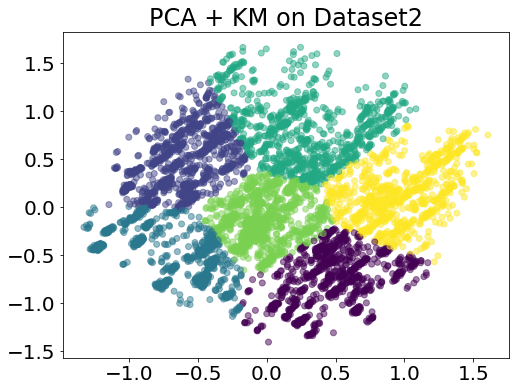

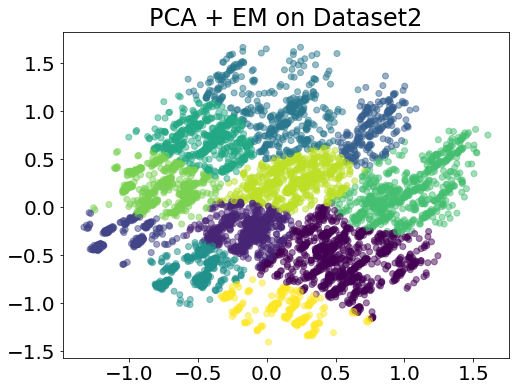

In [14]:
# pca
temp = PCA(n_components = 2).fit_transform(features2)

km_dic = {"n_clusters":6,"init":"k-means++","n_init":1,"max_iter":100}
res = KMeans(**km_dic).fit_predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("PCA + KM on Dataset2")

EM_dic = {"n_components":11,"init_params":"kmeans","n_init":1,"max_iter":100}
res = BayesianGaussianMixture(**EM_dic).fit(temp).predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("PCA + EM on Dataset2");

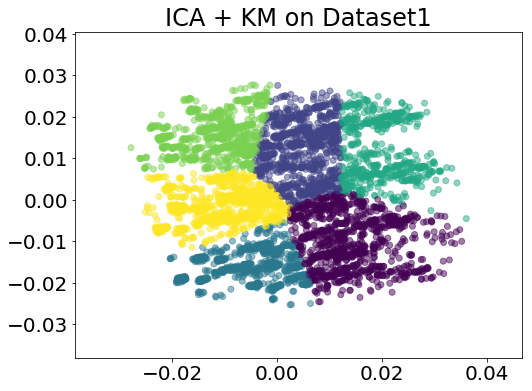

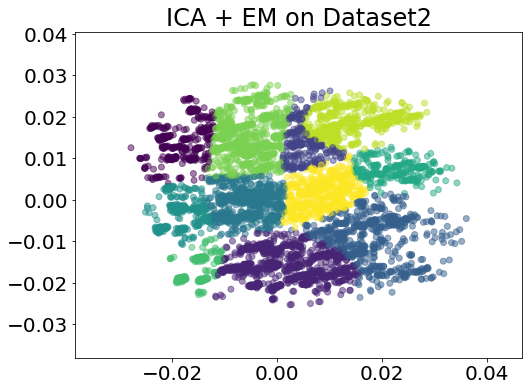

In [29]:
# ica
temp = FastICA(n_components = 2).fit_transform(features2)

km_dic = {"n_clusters":6,"init":"k-means++","n_init":1,"max_iter":100}
res = KMeans(**km_dic).fit_predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("ICA + KM on Dataset1")

EM_dic = {"n_components":11,"init_params":"kmeans","n_init":1,"max_iter":100}
res = BayesianGaussianMixture(**EM_dic).fit(temp).predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("ICA + EM on Dataset2");

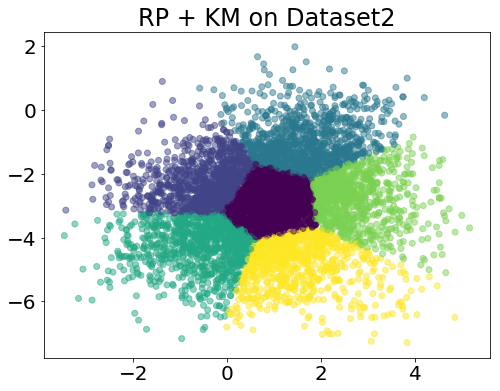

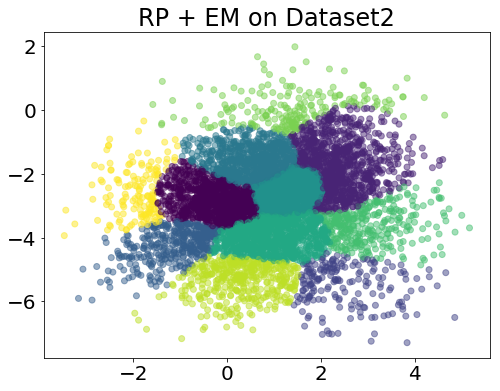

In [28]:
# rp
temp = GaussianRandomProjection(n_components = 2).fit_transform(features2)

km_dic = {"n_clusters":6,"init":"k-means++","n_init":1,"max_iter":100}
res = KMeans(**km_dic).fit_predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("RP + KM on Dataset2");

EM_dic = {"n_components":11,"init_params":"kmeans","n_init":1,"max_iter":100}
res = BayesianGaussianMixture(**EM_dic).fit(temp).predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("RP + EM on Dataset2");

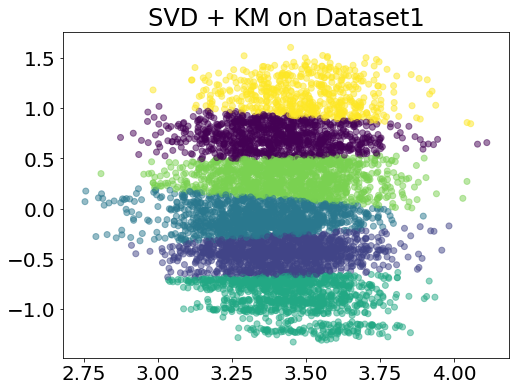

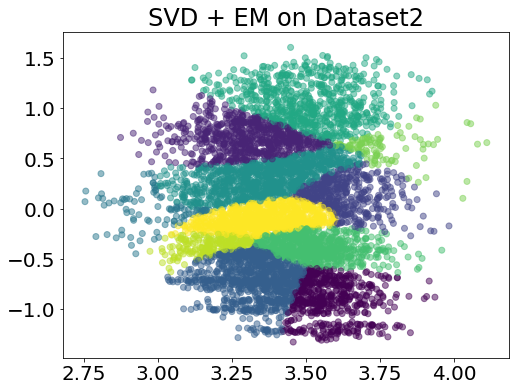

In [30]:
# svd
temp = TruncatedSVD(n_components = 2).fit_transform(features2)

km_dic = {"n_clusters":6,"init":"k-means++","n_init":1,"max_iter":100}
res = KMeans(**km_dic).fit_predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("SVD + KM on Dataset1");


EM_dic = {"n_components":11,"init_params":"kmeans","n_init":1,"max_iter":100}
res = BayesianGaussianMixture(**EM_dic).fit(temp).predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=res,alpha = 0.5);
plt.title("SVD + EM on Dataset2");

## 3.2 KMeans and EM Clustering on feature-reduced dataset1

In [35]:
# KM,dataset1
from tabulate import tabulate


km_dic = {"n_clusters":0,"init":"k-means++","n_init":1,"max_iter":100}
EM_dic = {"n_components":0,"init_params":"kmeans","n_init":1,"max_iter":100}
km_dic["n_clusters"] = 6
EM_dic["n_components"] = 11
km = KMeans(**km_dic)
em = BayesianGaussianMixture(**EM_dic)

# optimal n_components
models = [GaussianRandomProjection(36),PCA(36),TruncatedSVD(43),FastICA(84)]
names = ["RP(36)","PCA(36)","SVD(43)","ICA(84)"]

reclustering_km_res1 = []

    
for i,model in enumerate(models):
    temp = model.fit_transform(features)
    
    start_time = time.time()
    preds = km.fit_predict(temp)
    end_time = time.time()
    
    homogeneity,_,_ = homogeneity_completeness_v_measure(labels,preds)
    row = [names[i],-km.score(temp),np.sum(temp),
           float("%0.4f"%np.std(temp)),
           float("%0.2f"%adjusted_mutual_info_score(labels,preds)),
            float("%0.2f"%homogeneity),
           float("%0.2f"%(end_time - start_time))]
    reclustering_km_res1.append(row)
    
# original performance as reference
start_time = time.time()
preds = km.fit_predict(features)
end_time = time.time()
homogeneity,_,_ = homogeneity_completeness_v_measure(labels,preds)
row = ["Ori(103)",-km.score(features),np.sum(features.values),
       float("%0.4f"%np.std(features.values)),
       float("%0.2f"%adjusted_mutual_info_score(labels,preds)),
            float("%0.2f"%homogeneity),
       float("%0.2f"%(end_time - start_time))]
reclustering_km_res1.append(row)

    
print tabulate(reclustering_km_res1,headers=['', 'sum(dist)',"sum","std","MutualInfo","homogeneity","time"])    

            sum(dist)               sum     std    MutualInfo    homogeneity    time
--------  -----------  ----------------  ------  ------------  -------------  ------
RP(36)    124883       154675            0.4652          0.07           0.21    0.36
PCA(36)   127250            1.13435e-10  0.3445          0.06           0.19    0.35
SVD(43)   134510       102922            0.4448          0.06           0.17    0.22
ICA(84)       79.2074      -4.96214e-13  0.0047          0.01           0.02    0.27
Ori(103)  139283       425872            0.2774          0.06           0.17    0.54


In [95]:
# EM,dataset1
reclustering_em_res1 = []
  
for i,model in enumerate(models):
    temp = model.fit_transform(features)
    
    start_time = time.time()
    preds = em.fit(temp).predict(temp)
    end_time = time.time()
    
    homogeneity,_,v_measure = homogeneity_completeness_v_measure(labels,preds)
    row = [names[i],em.score(temp),np.sum(temp),
           float("%0.4f"%np.std(temp)),
           float("%0.2f"%adjusted_mutual_info_score(labels,preds)),
            float("%0.2f"%homogeneity),
           float("%0.2f"%(end_time - start_time))]
    reclustering_em_res1.append(row)
    
# original performance as reference
start_time = time.time()
preds = em.fit(features).predict(features)
end_time = time.time()
homogeneity,_,v_measure = homogeneity_completeness_v_measure(labels,preds)
row = ["Ori(103)",em.score(features),np.sum(features.values),
       float("%0.4f"%np.std(features.values)),
       float("%0.2f"%adjusted_mutual_info_score(labels,preds)),
            float("%0.2f"%homogeneity),
       float("%0.2f"%(end_time - start_time))]

reclustering_em_res1.append(row)

In [106]:
# rp,pca,svd use the least time (~10 sec)
print tabulate(reclustering_em_res1,headers = ["", 'mean(logP)',"sum","std","MutualInfo","homogeneity","time"])    

            mean(logP)               sum     std    MutualInfo    homogeneity    time
--------  ------------  ----------------  ------  ------------  -------------  ------
RP(36)         39.8629  -39992.6          0.4941          0.04           0.17   11.92
PCA(36)        31.9051       6.13838e-11  0.3445          0.05           0.2     8.86
SVD(43)        46.1773  102922            0.4448          0.06           0.23   13.16
ICA(84)       428.196       -2.33036e-13  0.0047          0.03           0.1    52.35
Ori(103)      348.077   425872            0.2774          0.07           0.24   62.27


## 3.3 KMeans and EM Clustering on feature-reduced dataset2

In [101]:
# KM,dataset2
from tabulate import tabulate


km_dic = {"n_clusters":0,"init":"k-means++","n_init":1,"max_iter":100}
EM_dic = {"n_components":0,"init_params":"kmeans","n_init":1,"max_iter":100}
km_dic["n_clusters"] = 6
EM_dic["n_components"] = 11
km = KMeans(**km_dic)
em = BayesianGaussianMixture(**EM_dic)

# optimal n_components
models = [TruncatedSVD(59),GaussianRandomProjection(60),PCA(60),FastICA(63)]
names = ["SVD(59)","RP(60)","PCA(60)","FastICA(63)"]

reclustering_km_res2 = []

    
for i,model in enumerate(models):
    temp = model.fit_transform(features2)
    
    start_time = time.time()
    preds = km.fit_predict(temp)
    end_time = time.time()
    
    homogeneity,_,v_measure = homogeneity_completeness_v_measure(labels2,preds)
    row = [names[i],-km.score(temp),np.sum(temp),
           float("%0.4f"%np.std(temp)),
           float("%0.2f"%adjusted_mutual_info_score(labels2,preds)),
            float("%0.2f"%homogeneity),
           float("%0.2f"%(end_time - start_time))]

    reclustering_km_res2.append(row)
    
# original performance as reference
start_time = time.time()
preds = km.fit_predict(features2)
end_time = time.time()
homogeneity,_,v_measure = homogeneity_completeness_v_measure(labels2,preds)
row = ["Ori(79)",-km.score(features2),np.sum(features2.values),
       float("%0.4f"%np.std(features2.values)),
       float("%0.2f"%adjusted_mutual_info_score(labels2,preds)),
            float("%0.2f"%homogeneity),
       float("%0.2f"%(end_time - start_time))]

reclustering_km_res2.append(row)

In [102]:
print tabulate(reclustering_km_res2,headers=['', 'sum(dist)',"sum","std","MutualInfo","homogeneity","time"])    

               sum(dist)               sum     std    MutualInfo    homogeneity    time
-----------  -----------  ----------------  ------  ------------  -------------  ------
SVD(59)       17234.6      21083.5          0.506           0              0.01    0.05
RP(60)        18333.4      -1090.18         0.4413          0              0.01    0.06
PCA(60)       17394.8         -7.28306e-14  0.2464          0              0.01    0.06
FastICA(63)      59.0783      -1.20792e-13  0.0127          0.01           0.02    0.08
Ori(79)       17932.7     158550            0.2983          0.01           0.01    0.07


In [108]:
# EM,dataset2
reclustering_em_res2 = []
  
for i,model in enumerate(models):
    temp = model.fit_transform(features2)
    
    start_time = time.time()
    preds = em.fit(temp).predict(temp)
    end_time = time.time()
    
    homogeneity,_,v_measure = homogeneity_completeness_v_measure(labels2,preds)
    row = [names[i],em.score(temp),np.sum(temp),
           float("%0.4f"%np.std(temp)),
           float("%0.2f"%adjusted_mutual_info_score(labels2,preds)),
            float("%0.2f"%homogeneity),
           float("%0.2f"%(end_time - start_time))]

    reclustering_em_res2.append(row)
    
# original performance as reference
start_time = time.time()
preds = em.fit(features2).predict(features2)
end_time = time.time()
homogeneity,_,v_measure = homogeneity_completeness_v_measure(labels2,preds)
row = ["Ori(79)",em.score(features2),np.sum(features2.values),
       float("%0.4f"%np.std(features2.values)),
       float("%0.2f"%adjusted_mutual_info_score(labels2,preds)),
            float("%0.2f"%homogeneity),
       float("%0.2f"%(end_time - start_time))]

reclustering_em_res2.append(row)

In [109]:
# svd,pca,ica,rp use less time (few secs), but varies a lot between different runs
print tabulate(reclustering_em_res2,headers = ["", 'mean(logP)',"sum","std","MutualInfo","homogeneity","time"])    

               mean(logP)               sum     std    MutualInfo    homogeneity    time
-----------  ------------  ----------------  ------  ------------  -------------  ------
SVD(59)           47.7895   21083.5          0.506           0              0.01    5.94
RP(60)            53.3568  -42150.6          0.5432          0              0.01    9.76
PCA(60)           47.601       -1.56142e-12  0.2464          0              0.01   10.9
FastICA(63)      205.669       -3.29181e-13  0.0127          0.01           0.02    2.31
Ori(79)           94.7666  158550            0.2983          0.01           0.02   15.57


# 4. Neuron Network on Reprojected Dataset2

In [33]:
# ori + 4 reprojected data = 5
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

learner = MLPClassifier(hidden_layer_sizes = (50,))

n = X_train2.shape[0]
train_sizes = [int(0.1*i*n)+1 for i in range(10)] + [n]

models = [TruncatedSVD(59),GaussianRandomProjection(60),PCA(60),FastICA(63)]
names = ["SVD(59)","RP(60)","PCA(60)","FastICA(63)","Ori(79)"]

datasets2 = []
for model in models:
    temp = model.fit_transform(X_train2)
    datasets2.append(temp)
datasets2.append(X_train2)

/Users/luwang/anaconda/lib/python2.7/site-packages/sklearn/decomposition/fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


In [154]:
learningcurve_results = {}
time_res = {}

for name,dataset in zip(names,datasets2):
    learningcurve_results[name] = {"train":[],"test":[]}
    time_res[name] = []
    for size in train_sizes:
        start_time = time.time()
        learner.fit(X_train[:size],y_train[:size])
        end_time = time.time()
        ytrain_pred = learner.predict(X_train[:size])        
        ytest_pred = learner.predict(X_test)
        
        learningcurve_results[name]['train'].append(accuracy_score(y_train[:size],ytrain_pred))
        learningcurve_results[name]['test'].append(accuracy_score(y_test,ytest_pred)) 
        time_res[name].append(end_time - start_time)

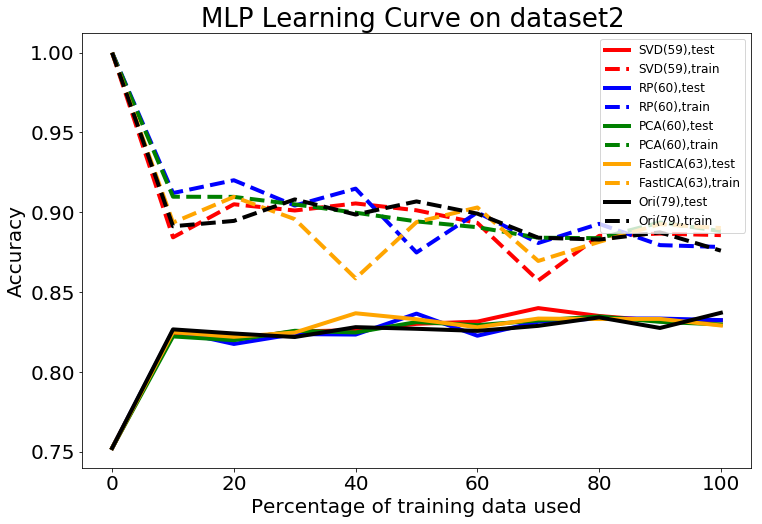

In [156]:
plt.figure(figsize = (12,8))
colors = ['red','blue','green','orange','black']

for name,color in zip(names,colors):
    x_data = [i*10 for i in range(11)]    
    plt.title('MLP Learning Curve on dataset2 ',fontsize = 26)
    plt.plot(x_data,learningcurve_results[name]['test'],c = color, label = name + ',test',linewidth = 4)
    plt.plot(x_data,learningcurve_results[name]['train'],c = color, linestyle='dashed',label = name + ',train',linewidth = 4)

    
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Accuracy")
    plt.legend(loc="best",fontsize = 12);   

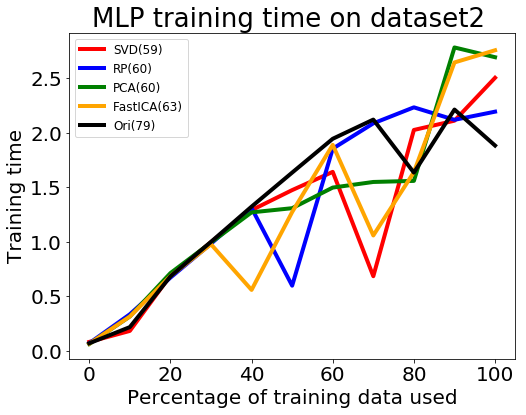

In [161]:
plt.figure(figsize = (8,6))

for name,color in zip(names,colors):
    x_data = [i*10 for i in range(11)]    
    plt.title('MLP training time on dataset2 ',fontsize = 26)
    plt.plot(x_data,time_res[name],c = color, label = name ,linewidth = 4)
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Training time")
    plt.legend(loc="best",fontsize = 12);   

# 5. Neuron Network on Reprojected features and Clustering features


In [36]:
# ori

models = [TruncatedSVD(59),GaussianRandomProjection(60),PCA(60),FastICA(63)]
names = ["Ori(79)",
         "4 KM clustering labels",
         "4 EM clustering labels",
         "79+4KM","79+4EM","79+4KM+4EM"]

datasets2 = []

KM_clustering_labels = []
EM_clustering_labels = []

for model in models:
    temp = model.fit_transform(X_train2)
    KM_clustering_labels.append(km.fit_predict(X_train2))

for model in models:
    temp = model.fit_transform(X_train2)
    EM_clustering_labels.append(em.fit(X_train2).predict(X_train2))

KM_clustering_labels = np.array(KM_clustering_labels).T
EM_clustering_labels = np.array(EM_clustering_labels).T   

datasets2 = [X_train2,KM_clustering_labels,EM_clustering_labels, 
             np.concatenate([X_train2,KM_clustering_labels],axis=1),
             np.concatenate([X_train2,EM_clustering_labels],axis=1),
             np.concatenate([X_train2,KM_clustering_labels,EM_clustering_labels],axis=1)]

In [38]:
learningcurve_results = {}
time_res = {}

for name,dataset in zip(names,datasets2):
    learningcurve_results[name] = {"train":[],"test":[]}
    time_res[name] = []
    for size in train_sizes:
        start_time = time.time()
        learner.fit(X_train[:size],y_train[:size])
        end_time = time.time()
        ytrain_pred = learner.predict(X_train[:size])        
        ytest_pred = learner.predict(X_test)
        
        learningcurve_results[name]['train'].append(accuracy_score(y_train[:size],ytrain_pred))
        learningcurve_results[name]['test'].append(accuracy_score(y_test,ytest_pred)) 
        time_res[name].append(end_time - start_time)

/Users/luwang/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


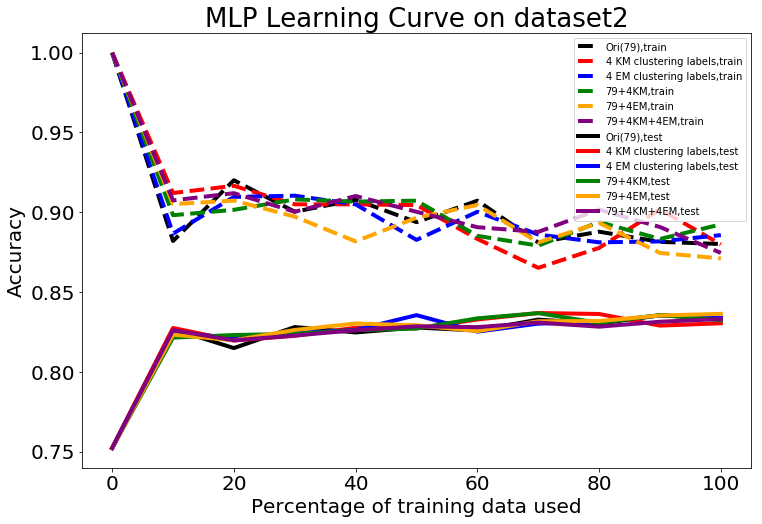

In [39]:
colors = ['black','red','blue','green','orange','purple']

plt.figure(figsize = (12,8))
for name,color in zip(names,colors):
    x_data = [i*10 for i in range(11)]    
    plt.title('MLP Learning Curve on dataset2',fontsize = 26)
    plt.plot(x_data,learningcurve_results[name]['train'],c = color, linestyle = 'dashed',label = name + ',train',linewidth = 4)

    
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Accuracy")
    plt.legend(loc="best",fontsize = 10);   

for name,color in zip(names,colors):
    x_data = [i*10 for i in range(11)]    
    plt.title('MLP Learning Curve on dataset2',fontsize = 26)
    plt.plot(x_data,learningcurve_results[name]['test'],c = color, label = name + ',test',linewidth = 4)

    
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Accuracy")
    plt.legend(loc="best",fontsize = 10);   

In [46]:
KM_clustering_labels= []
for model in models:
    temp = model.fit_transform(X_train2)
    KM_clustering_labels.append(km.fit_predict(X_train2))

temp_results = {}
temp_res = {}

for i,dataset in  enumerate(KM_clustering_labels):
    temp_results[i] = {"train":[],"test":[]}
    temp_res[i] = []
    for size in train_sizes:
        start_time = time.time()
        learner.fit(X_train[:size],y_train[:size])
        end_time = time.time()
        ytrain_pred = learner.predict(X_train[:size])        
        ytest_pred = learner.predict(X_test)
        
        temp_results[i]['train'].append(accuracy_score(y_train[:size],ytrain_pred))
        temp_results[i]['test'].append(accuracy_score(y_test,ytest_pred)) 
        temp_res[i].append(end_time - start_time)

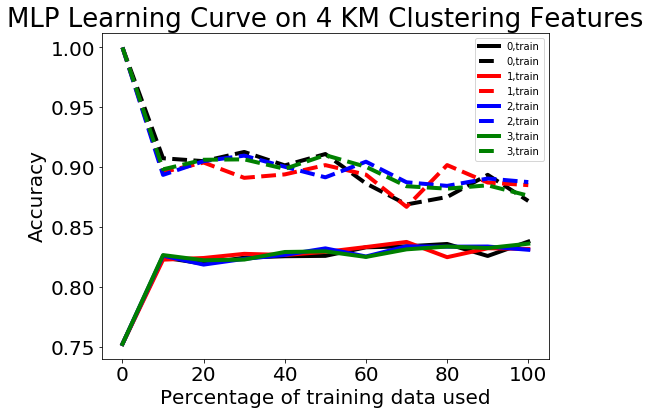

In [56]:
plt.figure(figsize = (8,6))
for i in range(4):
    x_data = [j*10 for j in range(11)]    
    plt.title('MLP Learning Curve on 4 KM Clustering Features',fontsize = 26)
    plt.plot(x_data,temp_results[i]['test'],c = colors[i], label = str(i) + ',train',linewidth = 4)
    plt.plot(x_data,temp_results[i]['train'],c = colors[i], linestyle = 'dashed',label = str(i) + ',train',linewidth = 4)
    
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Accuracy")
    plt.legend(loc="best",fontsize = 10);   